In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

<h1 style='font-family:Trebuchet MS; color:#34495E'> DataSet <a id='0'></a></h1>
<p style='font-family:Trebuchet MS'>The dataset can be found on <a href='https://www.kaggle.com/anthonypino/melbourne-housing-market'> Kaggle </a>.

<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents </h1>
<div class='alert alert-block alert-info' style='font-family:Trebuchet MS; color:#34495E'>

1.[DataSet](#0)<br>
2.[Feature Selection](#1) <br>
    2.1[Correlation Map](#1.1) <br>
    2.2[Train Test Split](#1.2) <br>
    2.3[Model Fitting](#1.3) <br>
    2.4[Model Evaluation](#1.4) <br>

</div>

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

<h1 style='font-family:Trebuchet MS; color:#34495E'> Feature Selection <a id='1'></a></h1>

<img src='https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png'>

<a href='https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/'> Feature Selection Reference </a>

<h2 style='font-family:Trebuchet MS; color:#34495E'> Correlation Map <a id='1.1'></a></h1>

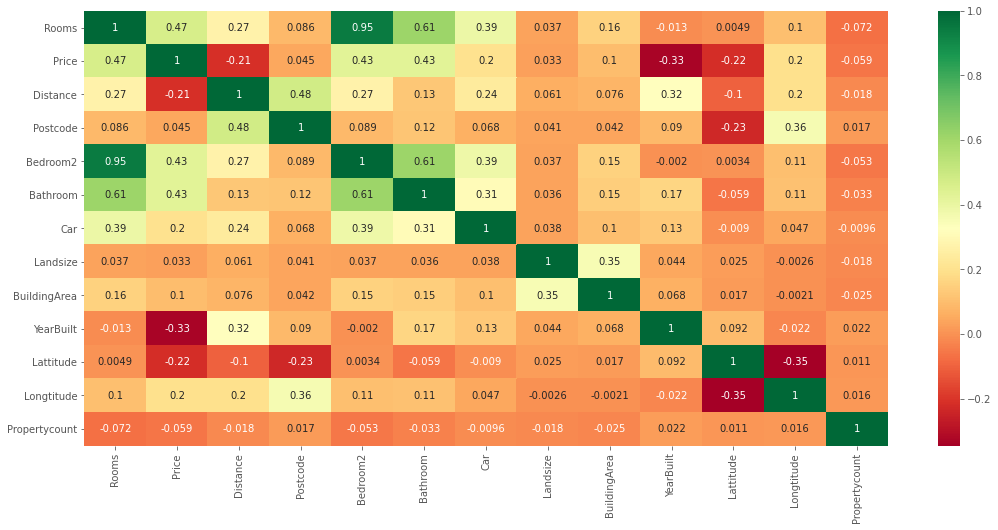

In [3]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [4]:
X = df.select_dtypes(include='number')
X = X.dropna()
y = X['Price']
X = X.drop(columns=['Price','Lattitude','Longtitude','Postcode'])

<h2 style='font-family:Trebuchet MS; color:#34495E'> Train Test Split <a id='1.2'></a></h1>

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

<h2 style='font-family:Trebuchet MS; color:#34495E'> Model Fitting <a id='1.3'></a></h1>

In [6]:
forest = RandomForestRegressor(random_state=1)
forest.fit(x_train, y_train)
yhat = forest.predict(x_test)

<h2 style='font-family:Trebuchet MS; color:#34495E'> Model Evaulation <a id='1.4'></a></h1>

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


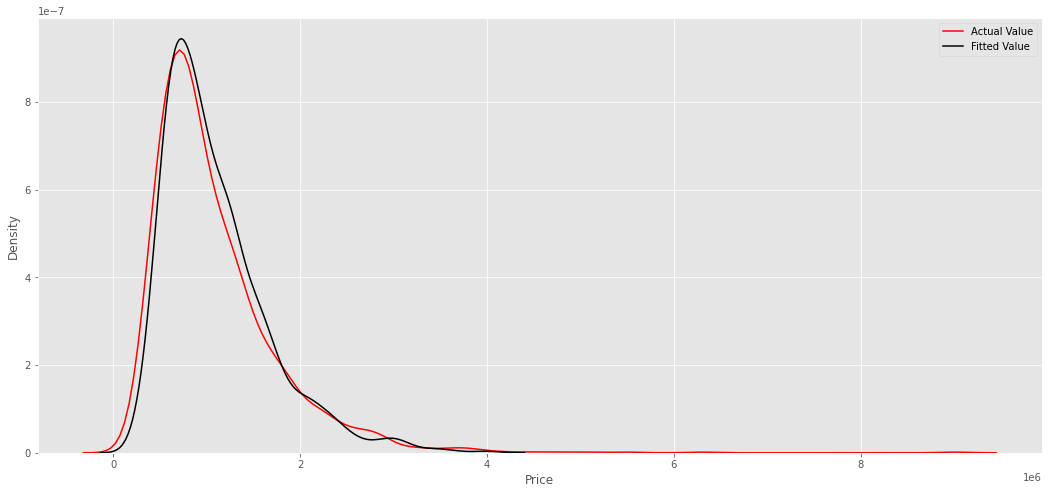

In [7]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(yhat, hist=False, color="k", label="Fitted Value", ax=ax1)
plt.legend()
plt.show()

In [8]:
print(mean_absolute_error(y_test, yhat))

210286.7350715089


<h4 style='font-family:Trebuchet MS; color:#34495E'> Observations:</h4>
<p style='font-family:Trebuchet MS'> The predicted values seem to fit the actual values.